In [1]:
import sys 
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn

# To identify system version 
print(sys.version)
print(pd.__version__)
print(plt.__version__)
print(sns.__version__)
print(sklearn.__version__)


3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
0.22.0
2.1.2
0.8.1
0.19.1


##  Problem statement: To predict average rating of each game review in given dataset

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df1=pd.read_csv("C:\\Python\\ML\\games.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

In [4]:
df1.shape


(81312, 20)

In [5]:
df1.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


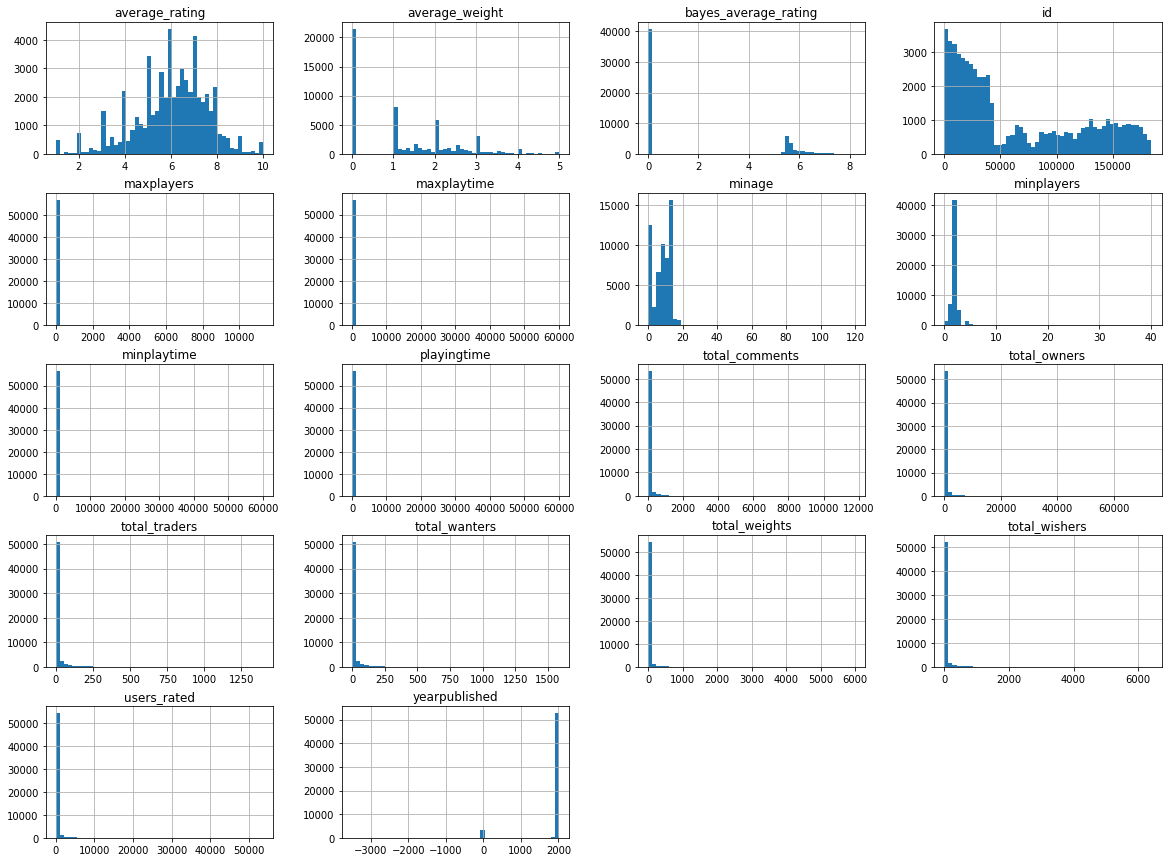

In [31]:

# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres

%matplotlib inline

df1.hist(bins=50, figsize=(20,15))
plt.show()

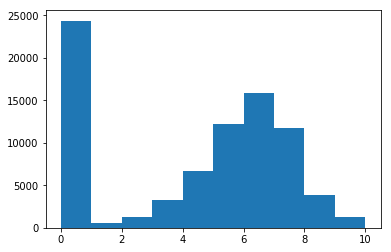

In [6]:
# Explore data of Aveg. rating via histogram

plt.hist(df1['average_rating'])
plt.show()

In [ ]:
# print the first rows of all games with zero scores
print(df1[df1['average_rating']==0].iloc[0])

In [ ]:
# print the first rows of all games with scores > zero
print(df1[df1['average_rating']> 0].iloc[0])

In [7]:
# Remove  any rows without user review
df1=df1[df1['users_rated']>0]

In [8]:
df1.shape

(56932, 20)

In [ ]:
df1.head()


In [ ]:
# No. of row with missing value in minplayers dataset
sum(df1.minplayers.isnull())


In [9]:
# Remove any rows with missing values
df1=df1.dropna(axis=0)


In [10]:
df1.shape

(56894, 20)

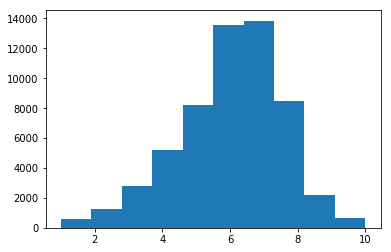

In [11]:
# Make a histogram of all the average ratings
plt.hist(df1["average_rating"])
plt.show()

In [12]:
print(df1.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


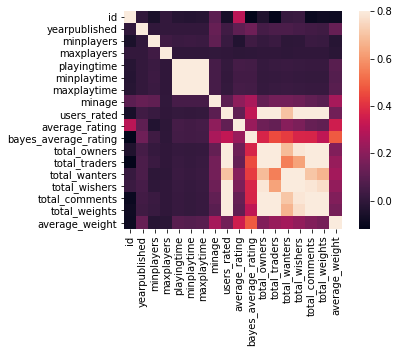

In [14]:
# Correraltion matrix
corr=df1.corr()
fig= plt.Figure(figsize=(12,9))
sns.heatmap(corr,vmax=.8,square=True)
plt.show()

In [34]:
corr_matrix = df1.corr()
corr_matrix

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
id,1.000000,0.002767,-0.050234,0.006141,-0.022017,-0.026729,-0.022017,0.099168,-0.057778,0.304201,-0.117172,-0.040308,-0.112069,0.017463,0.024777,-0.089659,-0.078830,-0.082301
yearpublished,0.002767,1.000000,0.004308,0.004977,0.006235,0.005245,0.006235,0.125281,0.037454,0.108461,0.140998,0.047740,0.064403,0.062289,0.052534,0.043818,0.036226,0.125318
minplayers,-0.050234,0.004308,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.034915,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.006141,0.004977,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.003437,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,-0.022017,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,-0.026729,0.005245,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.041845,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,-0.022017,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.099168,0.125281,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.266937,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,-0.057778,0.037454,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.317992,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,0.304201,0.108461,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.231563,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B103438>,
      dtype=object)

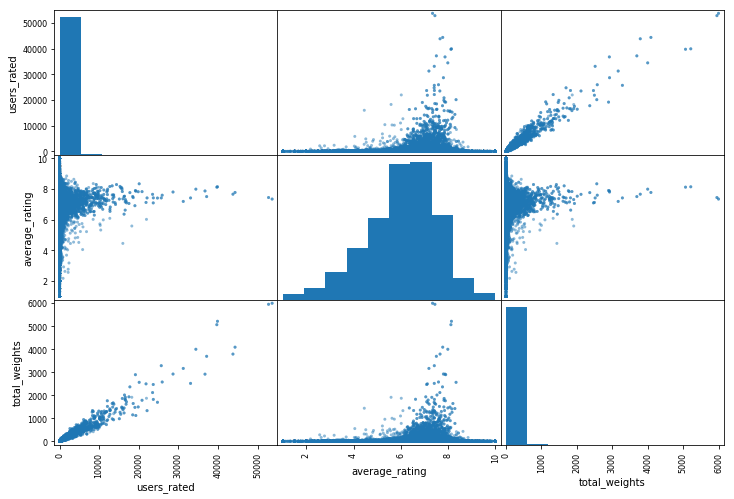

In [39]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas

from pandas.plotting import scatter_matrix

attributes = ["users_rated", "average_rating", "total_weights"]
scatter_matrix(df1[attributes], figsize=(12, 8))

In [15]:
# filter column which don't want , to get dependent varaiable

x=df1.drop(['bayes_average_rating','average_rating',"type","name","id"],axis=1)

In [16]:
x.shape

(56894, 15)

In [17]:
# to get target varaiable
y=df1.average_rating

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [19]:
print(x_train.shape)
print(x_test.shape)


(45515, 15)
(11379, 15)


In [20]:
# Import Linear Regression model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Generate predictions for the test set
y_pred=lr.predict(x_test)

In [22]:
y_pred

array([6.18905753, 5.78686103, 5.85125999, ..., 5.82999011, 5.43597068,
       5.97872956])

In [23]:
#compute error between our test predictions and actual values
lr.score(x_test,y_test)


0.16068442097557

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

2.0989930026570565

In [25]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
rf.fit(x_train,y_train)

y_pred1= rf.predict(x_test)


In [26]:
rf.score(x_test,y_test)

0.4182485305259912

In [27]:
mean_squared_error(y_pred1, y_test)

1.4548666725937924

## Observation that compare to linear model , Random forest model provide good score 
#(0.4 1) with less MSE 1.48

In [28]:
# prdict the model value
x_test.iloc[100]

yearpublished     2014.0
minplayers           2.0
maxplayers           6.0
playingtime         15.0
minplaytime         15.0
maxplaytime         15.0
minage               8.0
users_rated         10.0
total_owners        22.0
total_traders        0.0
total_wanters        1.0
total_wishers        2.0
total_comments       4.0
total_weights        1.0
average_weight       1.0
Name: 71833, dtype: float64

In [29]:
# Prediction with both model
rating_lr= lr.predict(x_test.iloc[0].values.reshape(1,-1))
rating_rf= rf.predict(x_test.iloc[0].values.reshape(1,-1))

print(rating_lr)
print(rating_rf)

[6.18905753]
[6.18390833]


In [30]:
# actual value of test data in Rw.no. zeroin test datset

y_test.iloc[0]

6.38889

##  compare to cell in 107, 109 -> actual value ( Pred- 6.9, Actual 6.5) matches well with RFS prediction, so model work well with Random forest model